<h1 style="color:blue;">IRIS FLOWER CLASSIFICATION</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Loading dataset</h3>

In [2]:
df=pd.read_csv("IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<h3>Understanding dataset</h3>

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<h3>Preprocessing the data</h3>

In [5]:
x=df.drop(columns=['species'])
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
y=df.species
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [7]:
df['target'] = df['species'].apply(lambda x: 1 if x == 'Iris-setosa' else (2 if x == 'Iris-versicolor' else 3))

In [8]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,target
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,3
146,6.3,2.5,5.0,1.9,Iris-virginica,3
147,6.5,3.0,5.2,2.0,Iris-virginica,3
148,6.2,3.4,5.4,2.3,Iris-virginica,3


<h3>visualization of  dataset</h3>

In [9]:
df0=df[df.target==1]
df1=df[df.target==2]
df2=df[df.target==3]

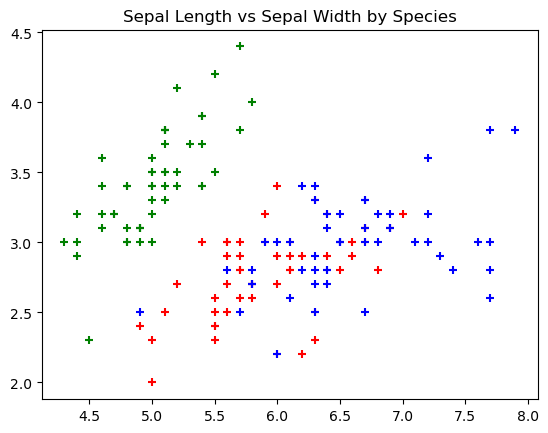

In [10]:
plt.scatter(df0.sepal_length,df0.sepal_width,marker='+',color='green')
plt.scatter(df1.sepal_length,df1.sepal_width,marker='+',color='red')
plt.scatter(df2.sepal_length,df2.sepal_width,marker='+',color='blue')
plt.title("Sepal Length vs Sepal Width by Species")
plt.show()

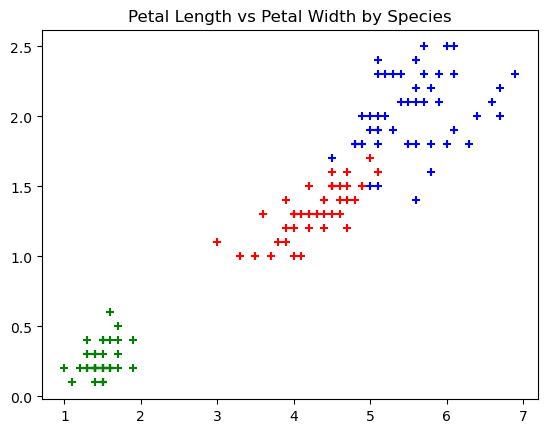

In [11]:
plt.scatter(df0.petal_length,df0.petal_width,marker='+',color='green')
plt.scatter(df1.petal_length,df1.petal_width,marker='+',color='red')
plt.scatter(df2.petal_length,df2.petal_width,marker='+',color='blue')
plt.title("Petal Length vs Petal Width by Species")
plt.show()

In [12]:
y=df.target
y

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: target, Length: 150, dtype: int64

<h4>Spliting data into train and test dataset</h4>

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.1,random_state=23)

<h3>Model training</h3>

<h4>Random Forest Regressor</h4>

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [16]:
model=RandomForestRegressor(n_estimators=99, random_state=23)
model.fit(x_train,y_train)
model.score(x_train,y_train)

0.993599065552998

In [17]:
model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=99, random_state=23)

In [18]:
model.score(x_train,y_train)

0.993599065552998

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
y_pred=model.predict(x_test).astype(int)
y_pred

array([3, 3, 2, 1, 2, 2, 1, 3, 1, 2, 2, 1, 3, 1, 1])

In [21]:
y_test

139    3
125    3
67     2
3      1
113    3
52     2
18     1
137    3
20     1
64     2
73     2
30     1
102    3
19     1
10     1
Name: target, dtype: int64

<h3>Heatmap of Actual vs Predicted Binned Ratings</h3>

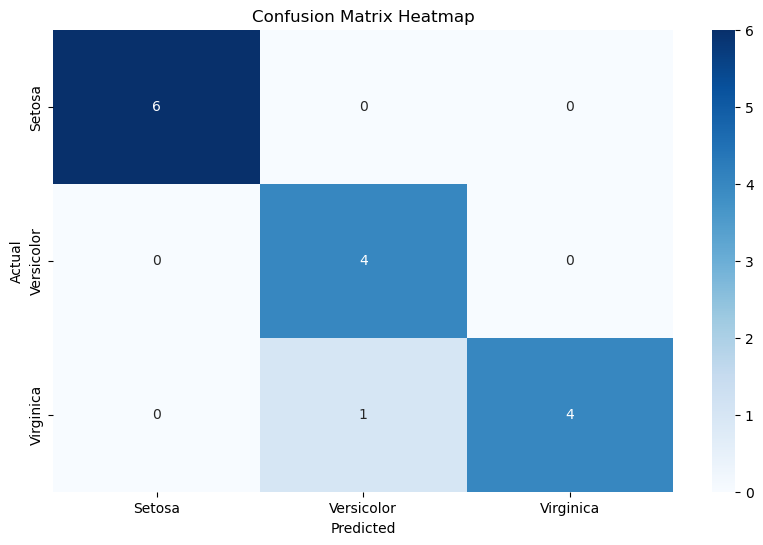

In [22]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Setosa', 'Versicolor', 'Virginica'],
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

<h3>Model Accuracy</h3>

In [23]:
Accuracy=model.score(x_test,y_test)

In [24]:
print(f"The model achieved {Accuracy*100} % accuracy on the test set.")

The model achieved 99.6397828992064 % accuracy on the test set.
